# <font face="Arial" size="12" color="royalblue"><b>CUSTOMER SEGMENTATION</b></font>

---



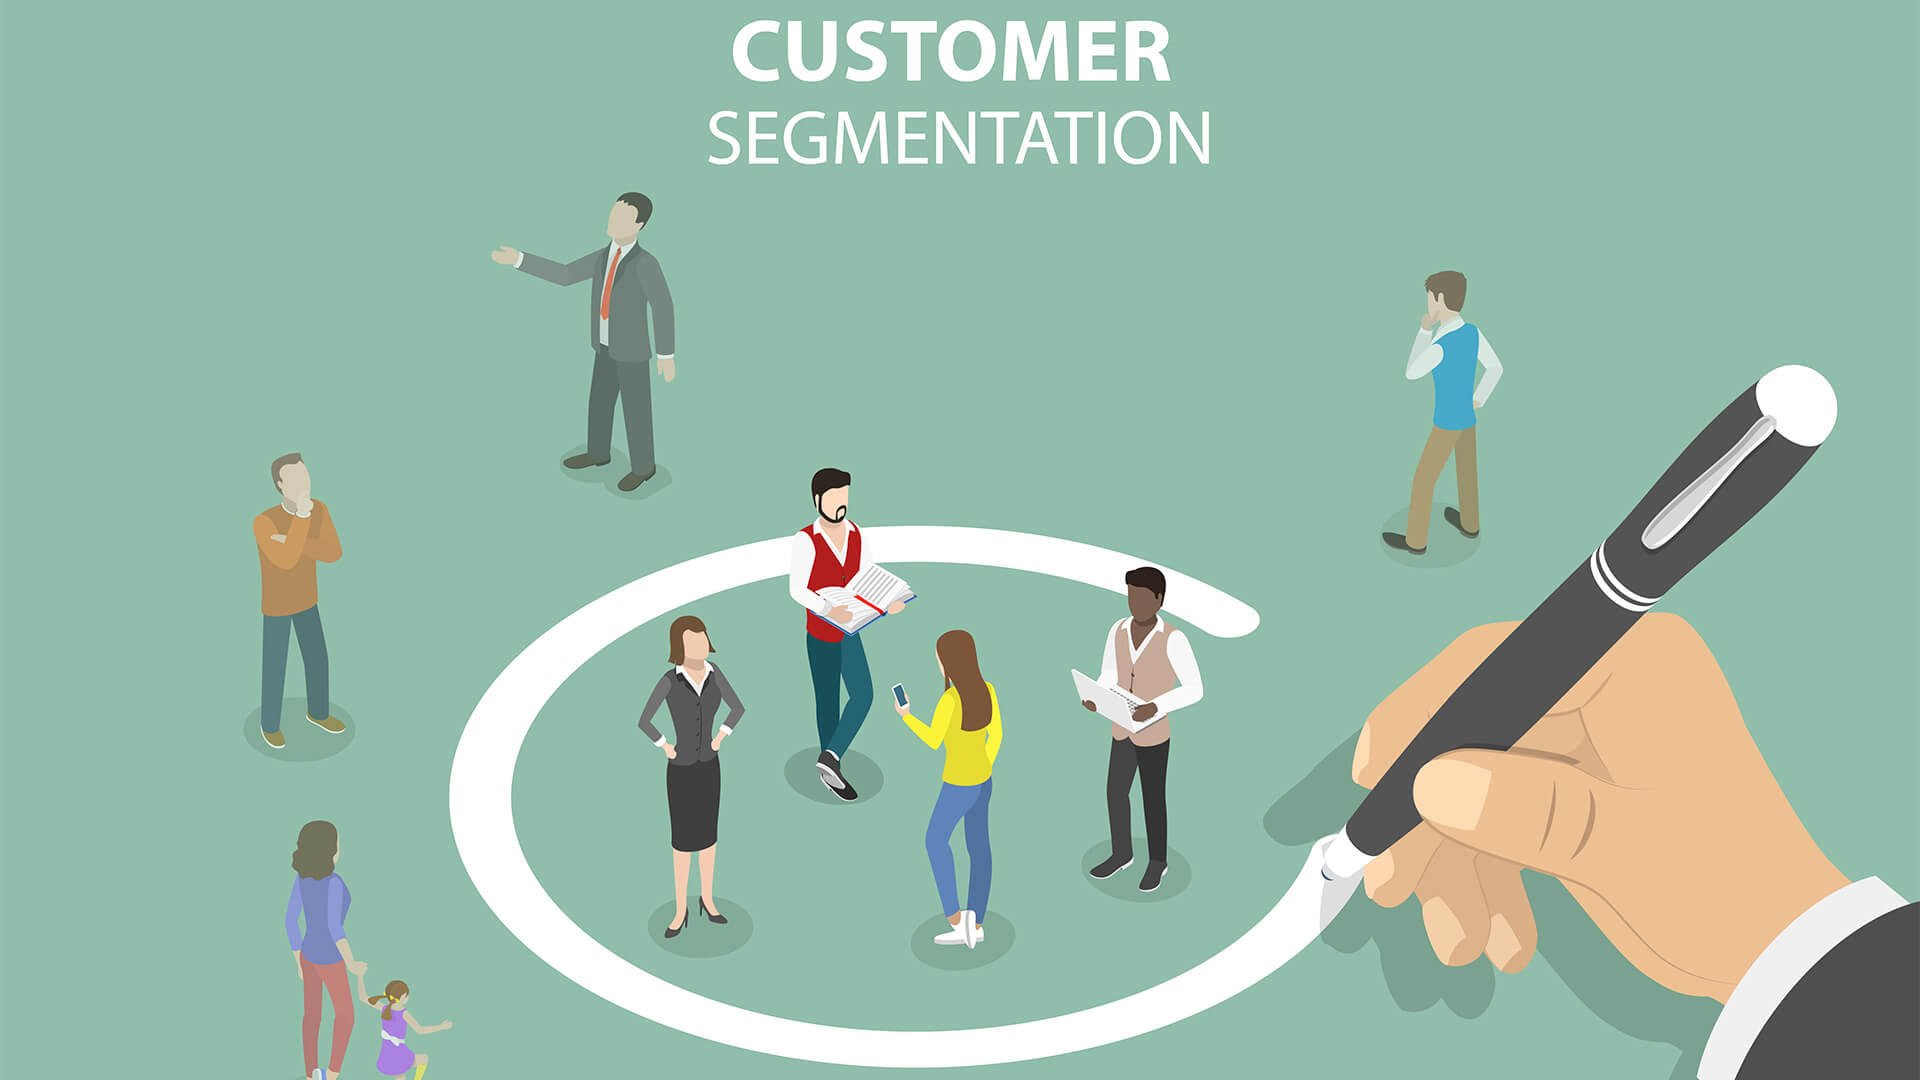

# <font face="Arial" size="5" color="royalblue"><b>ABOUT THIS NOTEBOOK</b></font>

---

The Online Retail a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

But first, let's see some deep understand of both concepts:

* **Customer segmentation:** Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.

* **Market basket analysis:** Market basket analysis is a method to gain insights into granular behavior of customers. This is helpful in devising strategies which uncovers deeper understanding of purchase decisions taken by the customers. This is interesting as a lot of times even the customer will be unaware of such biases or trends in their purchasing behavior.

# <font face="Arial" size="5" color="royalblue"><b>LIBRARIES</b></font>

---

In [96]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import math
import matplotlib.patches as mpatches
import plotly.express as px
import itertools
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from pathlib import Path
from scipy.stats import norm, probplot
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# <font face="Arial" size="5" color="royalblue"><b>1. DATA PREPARATION </b></font>

---

## <font face="Arial" size="5" color="royalblue"><b>DATA</b></font>

---

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PROJECT DATASETS/Customer_Segmentation.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


This dataframe contains 8 variables that correspond to:

* **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

* **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

* **Description:** Product (item) name. Nominal.

* **Quantity:** The quantities of each product (item) per transaction. Numeric.

* **InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.

* **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

* **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

* **Country:** Country name. Nominal, the name of the country where each customer resides.

## <font face="Arial" size="5" color="royalblue"><b>DATA DESCRIPTION AND INFORMATION</b></font>

---

### DATA INFORMATION

In [4]:
#Get the information for the DataFrame
column_names = df.columns
non_null_counts = df.count()
data_types = df.dtypes

# Create a DataFrame to hold the information
info_df = pd.DataFrame({
    'Column Name': column_names,
    'Non-Null Count': non_null_counts,
    'Data Type': data_types
})

# Display the information DataFrame
info_df

,Column Name,Non-Null Count,Data Type
InvoiceNo,InvoiceNo,541909,object
StockCode,StockCode,541909,object
Description,Description,540455,object
Quantity,Quantity,541909,int64
InvoiceDate,InvoiceDate,541909,object
UnitPrice,UnitPrice,541909,float64
CustomerID,CustomerID,406829,object
Country,Country,541909,object


### DATA DESCRIPTION

In [ ]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


## <font face="Arial" size="5" color="royalblue"><b>HANDLING MISSING DATA</b></font>

---

In [5]:
# Step 1: Total number of missing values in each column
missing_values_count = df.isnull().sum()

# Step 2: Total number of rows in the DataFrame
total_rows = df.shape[0]

# Step 3: Percentage of missing values for each column
percentage_missing_values = (missing_values_count / total_rows) * 100

# Step 4: New DataFrame to display the results
missing_values_df = pd.DataFrame({
    'Variables': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Percentage Missing': percentage_missing_values.values
})

# Step 5: Sort the DataFrame by percentage of missing values in descending order
missing_values_df = missing_values_df.sort_values(by='Percentage Missing')

# Step 6: DataFrame with missing value information
missing_values_df

,Variables,Missing Values,Percentage Missing
0,InvoiceNo,0,0.000000
1,StockCode,0,0.000000
3,Quantity,0,0.000000
4,InvoiceDate,0,0.000000
5,UnitPrice,0,0.000000
7,Country,0,0.000000
2,Description,1454,0.268311
6,CustomerID,135080,24.926694


While looking at the number of null values in the dataframe, it is interesting to note that ∼ 25% of the entries are not assigned to a particular customer. With the data available, it is impossible to impute values for the user and these entries are thus useless for the current exercise. So I delete them from the dataframe:



# <font face="Arial" size="5" color="royalblue"><b>2. EXPLORING THE VARIABLES</b></font>

---



### <font face="Arial" size="5" color="royalblue"><b>MARKET ANALYSIS</b></font>

---

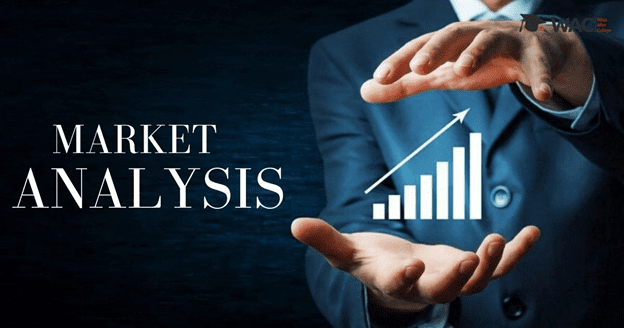

<font face="Arial" size="4" color="royalblue"><b>A. NUMBER OF ORDERS PER COUNTRY</b></font>

---

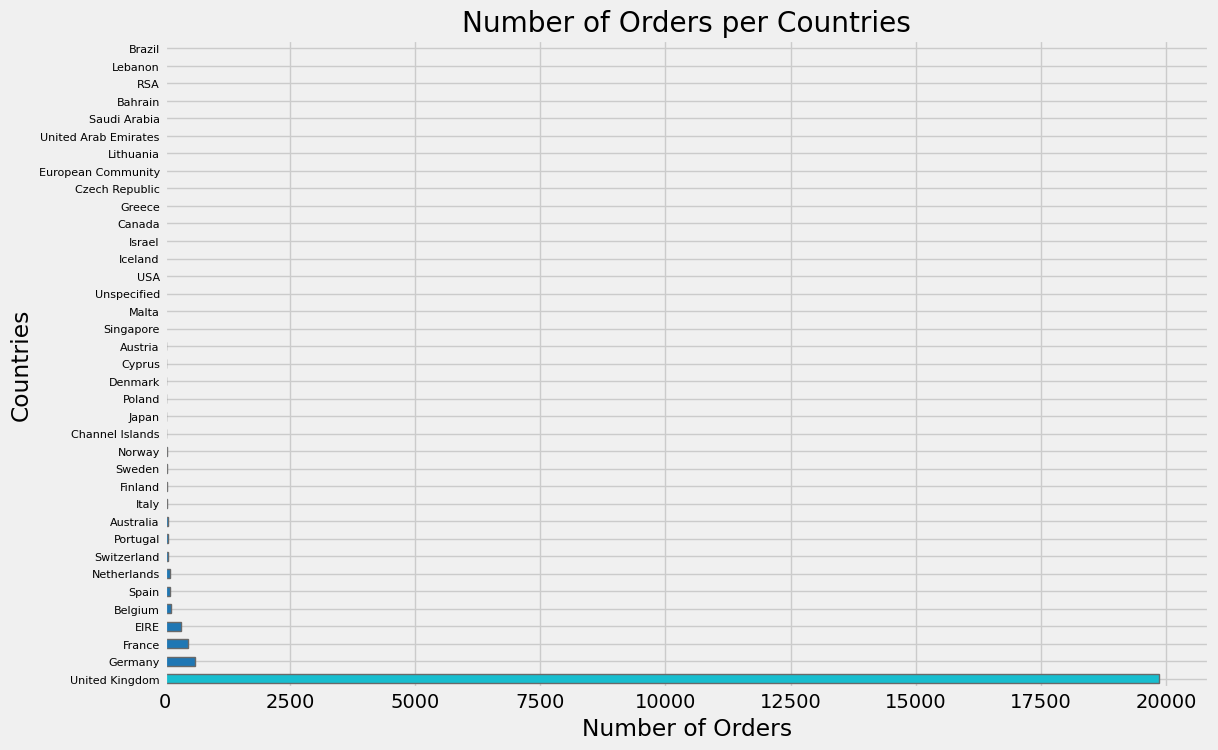

In [ ]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp=temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
plt.figure(figsize=(12, 8))
ax = countries.plot(kind='barh', color=plt.cm.get_cmap('tab10')(countries/float(countries.max())))
plt.title('Number of Orders per Countries')
plt.xlabel('Number of Orders')
plt.ylabel('Countries')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

<font face="Arial" size="4" color="royalblue"><b>B. INTERNAL MARKET</b></font>

---

Since this company is UK based, so we consider the market of UK as the internal market and other countires as external market.

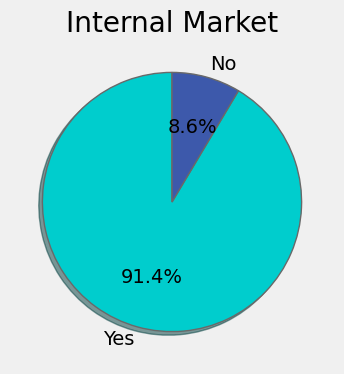

In [ ]:
df['Internal'] = df.Country.apply(lambda x: 'Yes' if x=='United Kingdom' else 'No' )
# Count the occurrences of 'Internal'
internal_market = df['Internal'].value_counts()

# Create a pie plot
plt.figure(figsize=(4,4))
plt.pie(internal_market, labels=internal_market.index, autopct='%1.1f%%', startangle=90, colors=['#00CDCD', '#3D59AB'],shadow=True)
plt.title('Internal Market')
plt.show()

### <font face="Arial" size="5" color="royalblue"><b>CUSTOMERS AND PRODUCTS</b></font>

---  
  


<font face="Arial" size="4" color="royalblue"><b>A. NUMBER OF USERS AND PRODUCTS</b></font>

---

In [ ]:
pd.DataFrame([{'products':df['StockCode'].nunique(),
               'transactions': df['InvoiceNo'].nunique(),
               'customers': df['CustomerID'].nunique(),
              }], columns = ['products', 'transactions', 'customers'], index = ['Unique Quantity'])

,products,transactions,customers
Unique Quantity,4070,25900,4372


It can be seen that the data concern 4372 users and that they bought 3684 different products. The total number of transactions carried out is of the order of  ∼ 25'900.

<font face="Arial" size="4" color="royalblue"><b>B. NUMBER OF PRODUCTS PURCHASED IN EVERY TRANSACTION</b></font>

---


In [ ]:
temp1 = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp1.rename(columns = {'InvoiceDate':'Number of products'})

temp2 = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].count()
customer_product_count = temp2.rename(columns={'InvoiceDate': 'Number of products'})

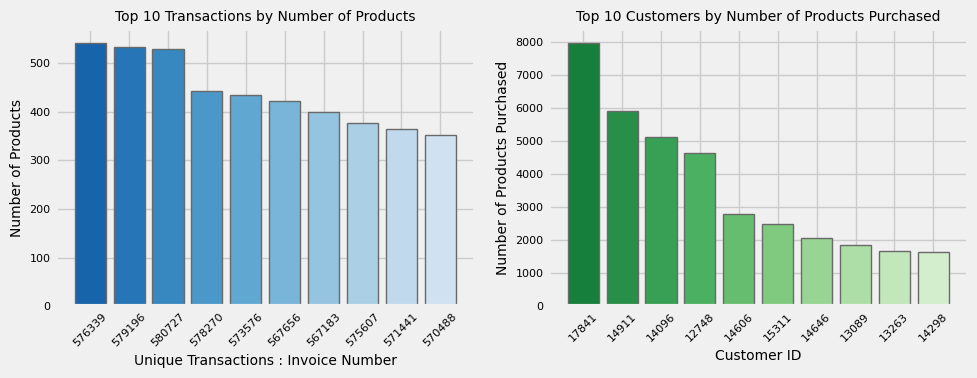

In [ ]:
# Get the top 10 transactions by number of items
top_10_transactions = nb_products_per_basket.sort_values(by='Number of products', ascending=False).head(10)

# Get the top 10 customers by the maximum amount of products purchased
top_10_customers = customer_product_count.sort_values(by='Number of products', ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot top 10 transactions
bar_colors1 = plt.cm.get_cmap('Blues')(np.linspace(0.8, 0.2, len(top_10_transactions)))
axes[0].bar(top_10_transactions['InvoiceNo'], top_10_transactions['Number of products'], color=bar_colors1)
axes[0].set_xlabel('Unique Transactions : Invoice Number',fontdict={'size': 10})
axes[0].set_ylabel('Number of Products',fontdict={'size': 10})
axes[0].set_title('Top 10 Transactions by Number of Products',fontdict={'size': 10})
axes[0].tick_params(axis='x', rotation=45, labelsize=8)
axes[0].tick_params(axis='y', rotation=0, labelsize=8)
# Plot top 10 customers
bar_colors2 = plt.cm.get_cmap('Greens')(np.linspace(0.8, 0.2, len(top_10_customers)))
axes[1].bar(top_10_customers['CustomerID'], top_10_customers['Number of products'], color=bar_colors2)
axes[1].set_xlabel('Customer ID',fontdict={'size': 10})
axes[1].set_ylabel('Number of Products Purchased',fontdict={'size': 10})
axes[1].set_title('Top 10 Customers by Number of Products Purchased',fontdict={'size': 10})
axes[1].tick_params(axis='x', rotation=45, labelsize=8)
axes[1].tick_params(axis='y', rotation=0, labelsize=8)
plt.tight_layout()
plt.show()

<font face="Arial" size="4" color="royalblue"><b>C. ANALYSIS OF CANCELLED TRANSACTIONS AND NEGATIVE QUANTITIES</b></font>

---

In [ ]:
# Display only the canceled transactions with invoice numbers beginning with 'C'
canceled_transactions = nb_products_per_basket[nb_products_per_basket['InvoiceNo'].str.startswith('C')]
canceled_transactions.head(10)

,CustomerID,InvoiceNo,Number of products,order_canceled
1,12346,C541433,1,1
23,12352,C545329,2,1
24,12352,C545330,1,1
25,12352,C547388,7,1
39,12359,C549955,2,1
40,12359,C580165,4,1
55,12362,C544902,2,1
56,12362,C563752,3,1
57,12362,C579178,3,1
66,12365,C544577,1,1


In [ ]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 3654/22190 (16.47%) 


We note that the number of cancellations is quite large ( ∼16% of the total number of transactions).

Now we encounter several ocations where the quantity is in negative.

In [ ]:
df.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Internal
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom,Yes
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346,United Kingdom,Yes
286628,562032,21578,WOODLAND DESIGN COTTON TOTE BAG,6,8/2/2011 8:48,2.25,12347,Iceland,No
72263,542237,47559B,TEA TIME OVEN GLOVE,10,1/26/2011 14:30,1.25,12347,Iceland,No
72264,542237,21154,RED RETROSPOT OVEN GLOVE,10,1/26/2011 14:30,1.25,12347,Iceland,No


On these few lines, we see that when an order is canceled, we have another transactions in the dataframe, mostly identical except for the Quantity and InvoiceDate variables. I decide to check if this is true for all the entries. To do this, I decide to locate the entries that indicate a negative quantity and check if there is systematically an order indicating the same quantity (but positive), with the same description (CustomerID, Description and UnitPrice).

**Hypothesis:** For transactions with a negative quantity of items, there should be corresponding transactions with a positive quantity for the same customer, same item description, and the same magnitude of quantity but with a positive value. In other words, if a customer is involved in a transaction with a negative quantity, there should be a corresponding transaction indicating that the same customer purchased the same item, but with a positive quantity.

In [ ]:
df_check = df[df['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1])
                & (df['Description'] == col[2])].shape[0] == 0:
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


CustomerID: 14527

Quantity: -1 (Negative quantity, which could represent a return or cancellation)

StockCode: D (This StockCode indicate a discount)

Description: Discount (The description of the item, which confirms that it's a discount)

UnitPrice: 27.5 (The unit price of the discount, indicating the amount of the reduction)

From this data, it appears that the transaction involves a negative quantity with the description "Discount," which implies that the customer received a discount of 27.5 units of currency on the corresponding order. The presence of "Discount" in the description, combined with the negative quantity, suggests that this entry represents a discount applied to a purchase.

 We now filter out rows with the description "Discount" before checking whether the hypothesis about negative quantities of items is fulfilled. It identifies cases where there are negative quantity transactions without corresponding positive quantity transactions for the same customer and item description (excluding "Discount" items).

In [ ]:
df_check = df[(df['Quantity'] < 0) & (df['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  df_check.iterrows():
    if df[(df['CustomerID'] == col[0]) & (df['Quantity'] == -col[1])
                & (df['Description'] == col[2])].shape[0] == 0:
        print(index, df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
---------------> HYPOTHESIS NOT FULFILLED


Once more, we find that the initial hypothesis is not verified. Hence, cancellations do not necessarily correspond to orders that would have been made beforehand.

At this point, I decide to create a new variable in the dataframe that indicate if part of the command has been canceled. For the cancellations without counterparts, a few of them are probably due to the fact that the buy orders were performed before December 2010 (the point of entry of the database). Below, I make a census of the cancel orders and check for the existence of counterparts:

In [6]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue
    df_test = df[(df['CustomerID'] == col['CustomerID']) &
                         (df['StockCode']  == col['StockCode']) &
                         (df['InvoiceDate'] < col['InvoiceDate']) &
                         (df['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0):
        doubtfull_entry.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1):
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1):
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index)
            break

In the above function, I checked the two cases:

1. a cancel order exists without counterpart.

2. there's at least one counterpart with the exact same quantity.

If no counterparts are found, the index of the current row is added to `doubtful_entry`. If one counterpart is found, the corresponding index is stored in index_order, and the '`QuantityCanceled`' value for that counterpart is updated. If multiple counterparts are found, the code sorts them in descending order and iterates through them. The first counterpart with a positive quantity greater than or equal to the negative quantity of the current row will have the '`QuantityCanceled`' value updated, and the index of the current row is added to `entry_to_remove`.

In [7]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 6168
doubtfull_entry: 4335


Among these entries, those listed in the doubtfull_entry list correspond to cancellation records that lack a preceding order. In practice, I've chosen to remove all of these entries, which make up approximately 1.4% and 0.2% of the total DataFrame entries.

Now, I am examining the count of cancellation entries that remain after the previous filtering step, where I have not deleted them.

In [ ]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("Number of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

Number of entries to delete: 44


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
27329,C538530,22630,DOLLY GIRL LUNCH BOX,-33,12/13/2010 10:26,1.95,14796,United Kingdom,0
32870,C539195,22942,CHRISTMAS LIGHTS 10 SANTAS,-5,12/16/2010 12:05,8.50,12748,United Kingdom,0
33085,C539221,22941,CHRISTMAS LIGHTS 10 REINDEER,-12,12/16/2010 12:56,8.50,14911,EIRE,0
33086,C539221,22942,CHRISTMAS LIGHTS 10 SANTAS,-10,12/16/2010 12:56,8.50,14911,EIRE,0
58496,C541245,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,-12,1/16/2011 12:40,4.25,15535,United Kingdom,0


### <font face="Arial" size="5" color="royalblue"><b>STOCK CODES</b></font>

---  

In [8]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
special_codes_df = pd.DataFrame(list_special_codes, columns=["SPECIAL CODES"])
special_codes_df

,SPECIAL CODES
0,POST
1,D
2,C2
3,DOT
4,M
5,BANK CHARGES
6,S
7,AMAZONFEE
8,DCGS0076
9,DCGS0003


In [ ]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
DOT             -> DOTCOM POSTAGE                
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
S               -> SAMPLES                       
AMAZONFEE       -> AMAZON FEE                    
DCGS0076        -> SUNJAR LED NIGHT NIGHT LIGHT  
DCGS0003        -> BOXED GLASS ASHTRAY           
gift_0001_40    -> Dotcomgiftshop Gift Voucher £40.00
DCGS0070        -> CAMOUFLAGE DOG COLLAR         
m               -> Manual                        
gift_0001_50    -> Dotcomgiftshop Gift Voucher £50.00
gift_0001_30    -> Dotcomgiftshop Gift Voucher £30.00
gift_0001_20    -> Dotcomgiftshop Gift Voucher £20.00
DCGS0055        -> nan                           
DCGS0072        -> nan                           
DCGS0074        -> nan                           
DCGS0069        -> OOH LA LA DOGS 

### <font face="Arial" size="5" color="royalblue"><b>BASKET PRICE</b></font>

---  

I am generating a new variable that denotes the total price for each purchase:

In [ ]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('CustomerID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom,74215,0.00
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/2011 8:48,12.75,12347,Iceland,0,38.25
72274,542237,84558A,3D DOG PICTURE PLAYING CARDS,12,1/26/2011 14:30,2.95,12347,Iceland,0,35.40
72273,542237,21731,RED TOADSTOOL LED NIGHT LIGHT,12,1/26/2011 14:30,1.65,12347,Iceland,0,19.80
72272,542237,22497,SET OF 2 TINS VINTAGE BATHROOM,4,1/26/2011 14:30,4.25,12347,Iceland,0,17.00


In the provided table, each DataFrame entry represents prices for a specific type of product. Consequently, orders are divided into multiple rows. My objective is to aggregate all purchases associated with a single order in order to retrieve the total order price:

In [ ]:
# Grouping and aggregating purchase data
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns={'TotalPrice': 'Basket Price'})
# Converting 'InvoiceDate' to datetime data type
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
# Grouping and working with datetime data
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].mean()
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate'])
# Filtering out entries with non-positive basket price
basket_price = basket_price[basket_price['Basket Price'] > 0]
# Sorting the DataFrame
basket_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
1,12347,537626,711.79,2010-12-07 14:57:00.000000000
2,12347,542237,475.39,2011-01-26 14:29:59.999999744
3,12347,549222,636.25,2011-04-07 10:43:00.000000000
4,12347,556201,382.52,2011-06-09 13:01:00.000000000
5,12347,562032,584.91,2011-08-02 08:48:00.000000000
6,12347,573511,1294.32,2011-10-31 12:25:00.000000000


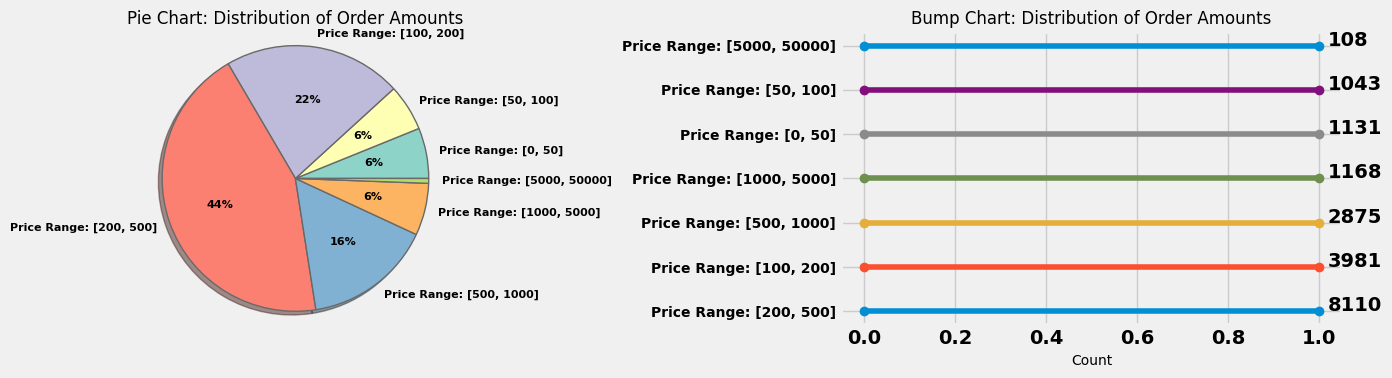

In [ ]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0:
        continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)
labels = ['Price Range: [{}, {}]'.format(price_range[i-1], s) for i, s in enumerate(price_range) if i != 0]
bump_data = pd.DataFrame({'Price Range': labels, 'Count': count_price})
bump_data.sort_values(by='Count', ascending=False, inplace=True)
bump_data.reset_index(drop=True, inplace=True)
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sizes = count_price
colors = plt.cm.Set3.colors
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct=lambda x: '{:1.0f}%'.format(x) if x > 1 else '',
       shadow=True, startangle=0, textprops={'fontsize': 8})  # Adjust fontsize here
plt.axis('equal')
plt.title("Pie Chart: Distribution of Order Amounts",  fontdict={'size': 12})
plt.subplot(1, 2, 2)
for i, row in bump_data.iterrows():
    plt.plot([0, 1], [i, i], marker='o', label=row['Price Range'])
    plt.annotate(f'{row["Count"]}', xy=(1, i), xytext=(6, 0), textcoords='offset points')

plt.yticks(bump_data.index, bump_data['Price Range'], fontdict={'size': 10})
plt.xlabel('Count', fontdict={'size': 10})
plt.title('Bump Chart: Distribution of Order Amounts', fontdict={'size': 12})
plt.tight_layout()
plt.show()

It's apparent that a substantial majority of orders revolve around comparatively sizable purchases, as roughly 65% of transactions result in amounts surpassing £200. Furthermore, approximately 44% of order values lie within the £200 to £500 range. This bump plot visually displays rank changes across price categories. Vertical lines depict the trajectory of each category, highlighting shifts in rank positions. It's effective for revealing trends and comparing relative changes, making it useful for showcasing shifts in market dynamics and the historical evolution of price distribution.

# <font face="Arial" size="5" color="royalblue"><b>3. INSIGHTS ON PRODUCT CATAGORIES</b></font>

---


In the dataset, each product is distinguished by a unique StockCode value. The Description variable contains a brief overview of the products. In this segment, my aim is to utilize the information in the Description variable to categorize the products into various groups.

### <font face="Arial" size="5" color="royalblue"><b>PRODUCT DESCRIPTION</b></font>

---

As an initial step, I am extracting pertinent information from the 'Description' variable utilizing the following function.

In [11]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]

        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1

    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]

    print("Number of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords


This function takes as input the dataframe and analyzes the content of the Description column by performing the following operations:

* extract the names (proper, common) appearing in the products description

* for each name, I extract the root of the word and aggregate the set of names associated with this particular root

* count the number of times each root appears in the dataframe

* when several words are listed for the same root, I consider that the keyword associated with this root is the shortest name (this systematically selects the singular when there are singular/plural variants)

The first step of the analysis is to retrieve the list of products:

In [13]:
df_produits = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})

Once this list is created, I use the function I previously defined in order to analyze the description of the various products:



In [16]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Number of keywords in variable 'Description': 1603


The execution of this function returns three variables:

* `keywords:` the list of extracted keywords

* `keywords_roots:` a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots

* `count_keywords:` dictionary listing the number of times every word is used

At this point, I convert the `count_keywords` dictionary into a list, to sort the keywords according to their occurences:

In [17]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

Using it, I create a representation of the most common keywords:

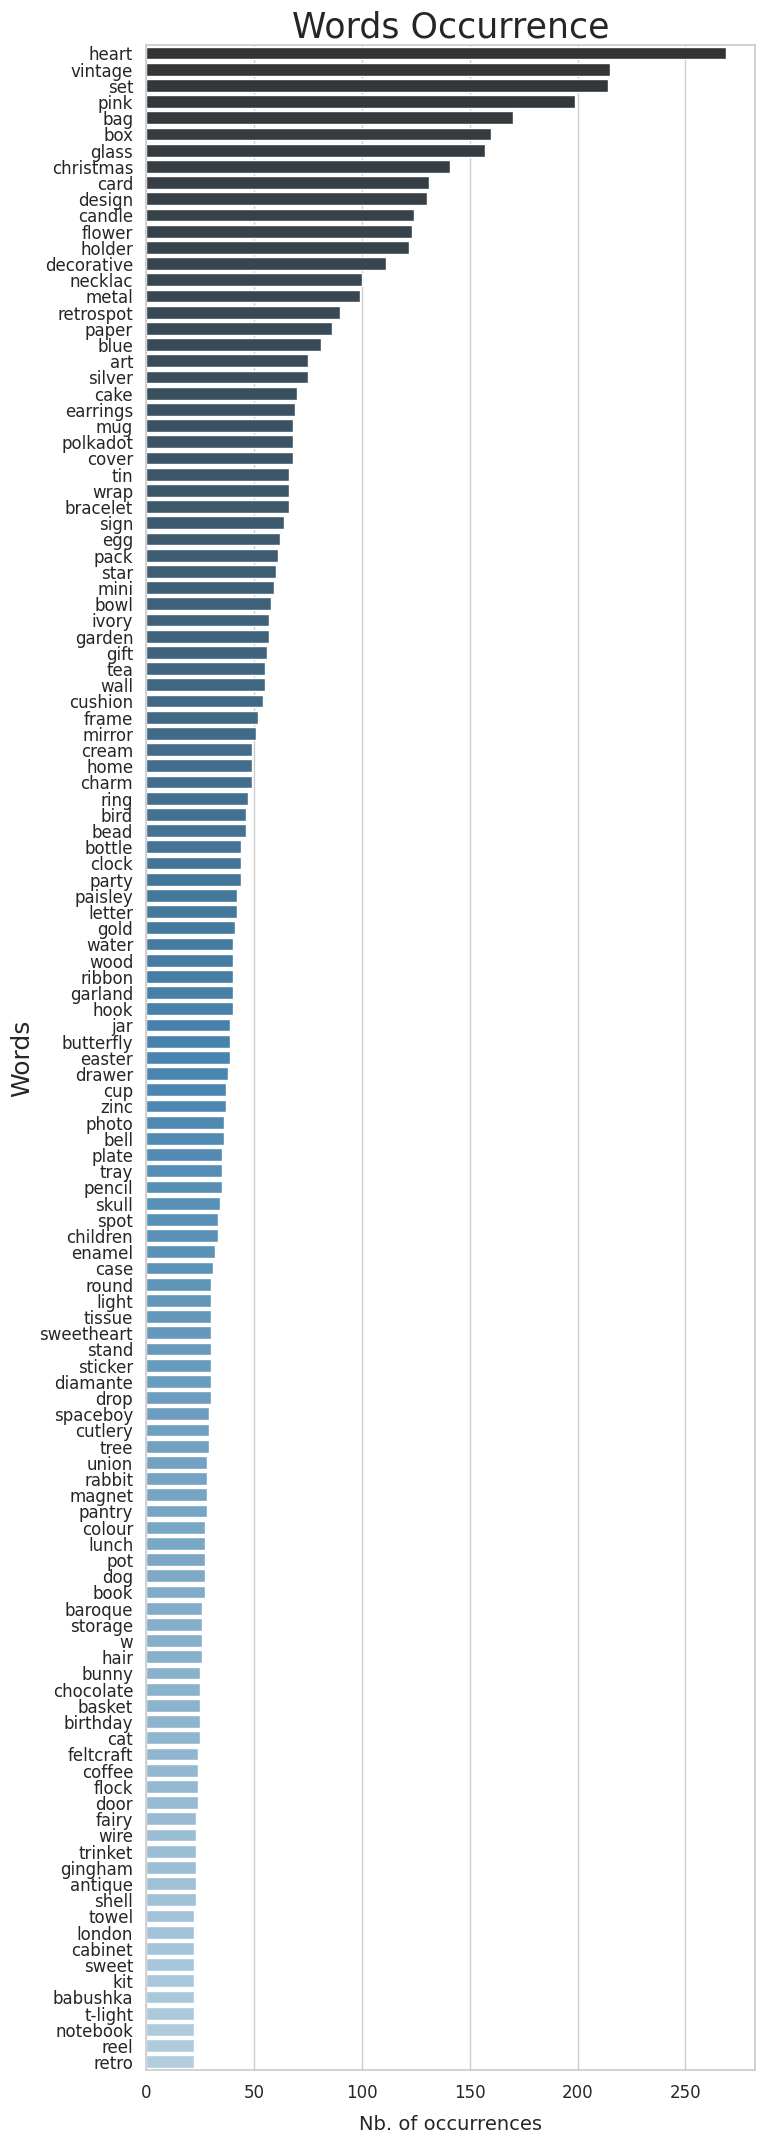

In [ ]:
# Assuming 'liste' contains the data
liste = sorted(list_products, key=lambda x: x[1], reverse=True)
y_axis = [i[1] for i in liste[:125]]
x_label = [i[0] for i in liste[:125]]

plt.rc('font', weight='normal')
plt.figure(figsize=(7, 25))

sns.set(style="whitegrid")

# Reversed color palette
color_palette = sns.color_palette("Blues_d", len(x_label))[::-1]

ax = sns.barplot(x=y_axis, y=x_label, palette=color_palette)

plt.xlabel("Nb. of occurrences", fontsize=14, labelpad=10)
plt.ylabel("Words", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Words Occurrence", fontsize=25)

plt.show()

### <font face="Arial" size="5" color="royalblue"><b>PRODUCT CATAGORIES</b></font>

---

The list that was obtained contains more than 1603 keywords and the most frequent ones appear in more than 200 products. However, while examinating the content of the list, I note that some names are useless. Others are do not carry information, like colors. Therefore, I discard these words from the analysis that follows and also, I decide to consider only the words that appear more than 13 times.

In [18]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
#______________________________________________________
list_products.sort(key = lambda x:x[1], reverse = True)
print('retained words:', len(list_products))

retained words: 197


<font face="Arial" size="4" color="royalblue"><b>A. DATA ENCODING</b></font>

---

To effectively categorize and group our products, I've devised a method involving the creation of a matrix that associates products with keywords. This matrix, which I'll refer to as X, will serve as a valuable tool in organizing our products based on their descriptions.

Let's break down how the matrix X is constructed:

* Rows: Each row in matrix X corresponds to a unique product that we offer. In total, we have M different products.

* Columns: On the other hand, each column represents a specific keyword or word. These words have been carefully selected from our product descriptions, and in total, we have N different words.

* Matrix Element: Now, the crux of the matter lies in the elements of this matrix. The entry in row i and column j, denoted as ai,j, is essentially a binary value. It tells us whether the product i's description contains the word j. If it does, then ai,j is set to 1; otherwise, it's set to 0.

By creating this matrix, we're able to capture the essence of our products' descriptions in a structured and computationally friendly format. The matrix X is essentially a representation of the relationships between our products and the words that define them.

In [19]:
liste_produits = df_cleaned['Description'].dropna().unique()
X = pd.DataFrame()

for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x: int(key.upper() in x), liste_produits))

The matrix X employs one-hot encoding to represent the words found within product descriptions. To achieve more balanced groupings in terms of element counts, I've discovered that introducing the price range as a factor is beneficial. Consequently, I'm expanding this matrix by incorporating six additional columns. These new columns will signify the price range associated with each product.

In [20]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

and to choose the appropriate ranges, I check the number of products in the different groups:

In [21]:
print("{:<8} {:<20} \n".format('range', 'number of produts') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

range    number of produts    
--------------------
0<.<1       729                 
1<.<2       1001                
2<.<3       736                 
3<.<5       743                 
5<.<10      596                 
.>10        418                 


<font face="Arial" size="4" color="royalblue"><b>B. CLUSTER OF PRODUCTS</b></font>

---

In this section, my objective is to categorize the products into distinct classes. When dealing with matrices that utilize binary encoding, the most appropriate measurement for calculating the differences between them is Hamming's metric. It's important to note that the kmeans method provided by sklearn employs Euclidean distance, which can be used for this purpose, but it might not be the optimal choice when dealing with categorical variables. Unfortunately, I cannot utilize the Hamming's metric directly due to the unavailability of the kmodes package on the current platform. As a result, I resort to using the kmeans method, even though it might not be the most suitable option in this context.

To roughly determine the optimal number of clusters that accurately represent the data, I make use of the silhouette score:

The silhouette score is a metric used to evaluate the quality of clusters formed by a clustering algorithm, such as k-means. It provides a way to measure how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where:

* A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

* A score of 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.

* A low silhouette score indicates that the object is closer to a neighboring cluster than its own.

In [22]:
matrix = X.values  # Convert DataFrame to a NumPy array
silhouette_scores = []
for n_clusters in range(3, 10):
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    silhouette_scores.append(silhouette_avg)
result_df = pd.DataFrame({'Number of Clusters': range(3, 10), 'Silhouette Score': silhouette_scores})
result_df

,Number of Clusters,Silhouette Score
0,3,0.096068
1,4,0.117790
2,5,0.131334
3,6,0.136465
4,7,0.120004
5,8,0.116531
6,9,0.116140


In practical terms, the scores I've obtained from my clustering experiments are quite similar. When evaluating silhouette scores, I've noticed that values around 0.1±0.05 are consistently obtained for all cluster sizes greater than 3, with a slight dip for the first cluster. However, beyond 5 clusters, I observed that some clusters contained very few data points. In light of this observation, I decided to proceed with segmenting the dataset into 5 clusters. This choice seemed to strike a balance between achieving a reasonable level of granularity and avoiding the creation of overly sparse clusters.

In order to ensure a robust and stable classification outcome, I adopted an iterative approach. I kept iterating until I achieved the best possible silhouette score, which in my case settled around 0.15. This iterative refinement process aimed to find the most suitable clustering solution by exploring different settings and options. This method resonates with standard practices in data analysis and clustering, as it acknowledges the potential for ambiguity in determining the ideal number of clusters.

Throughout this process, I've kept in mind that the selection of the number of clusters and the interpretation of the results should be grounded in domain knowledge and the specific goals of the analysis. While silhouette scores provide valuable insights, considering other evaluation techniques and domain expertise is crucial for making well-informed decisions about the final clustering solution.

In [24]:
n_clusters = 5
max_iterations = 4  # Set the maximum number of iterations to 4
total_silhouette_score = 0
iterations = 0

while iterations < max_iterations:
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    total_silhouette_score += silhouette_avg
    iterations += 1
    print("Iteration:", iterations, "For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

average_silhouette_score = total_silhouette_score / max_iterations

if average_silhouette_score >= 0.145:
    print("Average silhouette score for n_clusters =", n_clusters, "is:", average_silhouette_score)
else:
    print("Average silhouette score for n_clusters =", n_clusters, "is below the threshold.")

Iteration: 1 For n_clusters = 5 The average silhouette_score is: 0.13454659918946069
Iteration: 2 For n_clusters = 5 The average silhouette_score is: 0.13454659918946069
Iteration: 3 For n_clusters = 5 The average silhouette_score is: 0.1349778811008413
Iteration: 4 For n_clusters = 5 The average silhouette_score is: 0.135317662085048
Average silhouette score for n_clusters = 5 is below the threshold.


<font face="Arial" size="4" color="royalblue"><b>B. CHARACTERIZING THE CONTENT OF THE CLUSTER</b></font>

---

I check the number of elements in every class:

In [25]:
pd.Series(clusters).value_counts()

0    1014
1    1001
4     743
3     736
2     729
dtype: int64

> <font face="Arial"  color="darkred"><b> I. SILHOUETTE INTRA-CLUSTER SCORE</b></font>

---

Intra-class silhouette score measures how well data points within a single cluster are grouped together. It calculates the average silhouette score for each cluster, indicating the coherence and separation of points within clusters. Higher values suggest well-defined, internally consistent clusters.

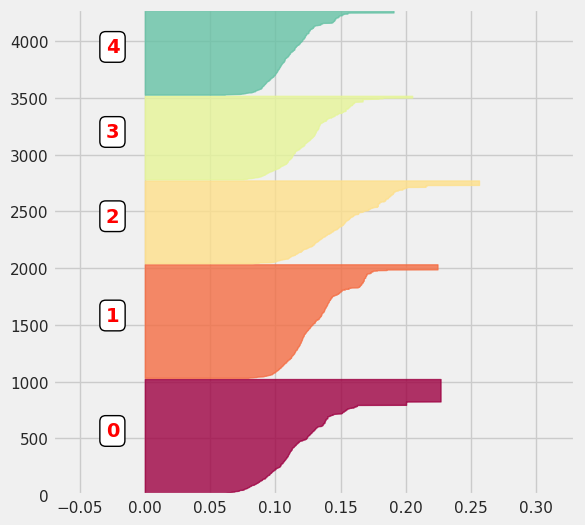

In [72]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(6, 6)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

The silhouette score ranges between 0.2 to 0.25 indicating the clusters are not well separated.

> <font face="Arial"  color="darkred"><b> II. WORDCLOUD</b></font>

---

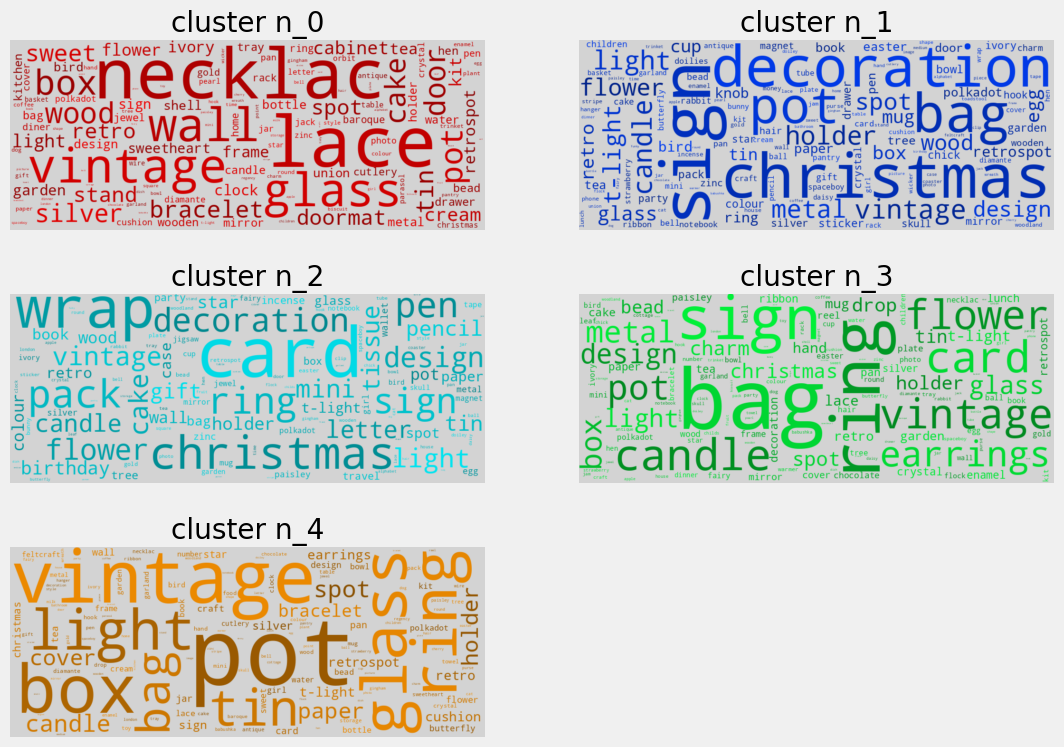

In [34]:
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))
#________________________________________________________________________
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey',
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster n_{}'.format(increment-1))
#________________________________________________________________________
fig = plt.figure(1, figsize=(12,12))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)

I successfully generated word cloud visuals to explore my product clusters. Each cloud showcases frequent words within cluster products, with varied colors denoting different terms. This visual approach aids in understanding the significant characteristics of each product group's content. From this representation, we can see that for example, one of the clusters contains objects that could be associated with gifts (keywords: Christmas, packaging, card, ...). Another cluster would rather contain luxury items and jewelry (keywords: necklace, bracelet, lace, silver, ...). Nevertheless, it can also be observed that many words appear in various clusters and it is therefore difficult to clearly distinguish them.

> <font face="Arial"  color="darkred"><b> III. PRINCIPAL COMPONENT ANALYSIS</b></font>

---

To ensure genuine differentiation among these clusters, I examine their makeup. Considering the extensive array of variables within the initial matrix, I begin by conducting a Principal Component Analysis (PCA).

In [35]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

and then check for the amount of variance explained by each component:

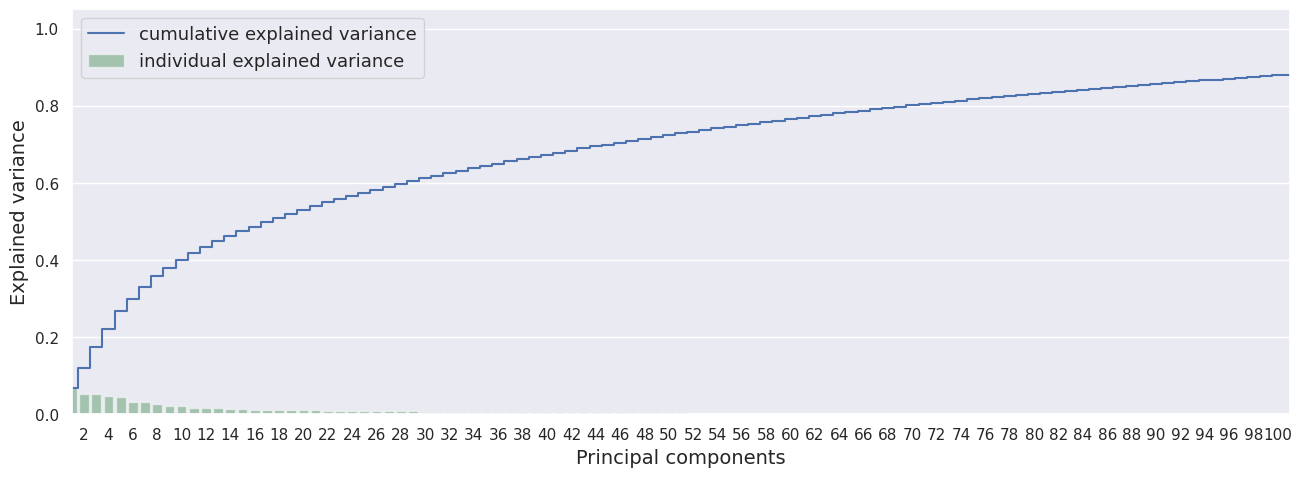

In [38]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')

sns.barplot(x=np.arange(1, matrix.shape[1]+1), y=pca.explained_variance_ratio_, alpha=0.5, color='g',
            label='individual explained variance')plt.xlim(0, 100)
ax.set_xticklabels([s if int(s.get_text()) % 2 == 0 else '' for s in ax.get_xticklabels()])
plt.ylabel('Explained variance', fontsize=14)
plt.xlabel('Principal components', fontsize=14)
plt.legend(loc='upper left', fontsize=13)
plt.show()

We see that the number of components required to explain the data is extremely important: we need more than 100 components to explain 90% of the variance of the data. In practice, I decide to keep only a limited number of components since this decomposition is only performed to visualize the data:

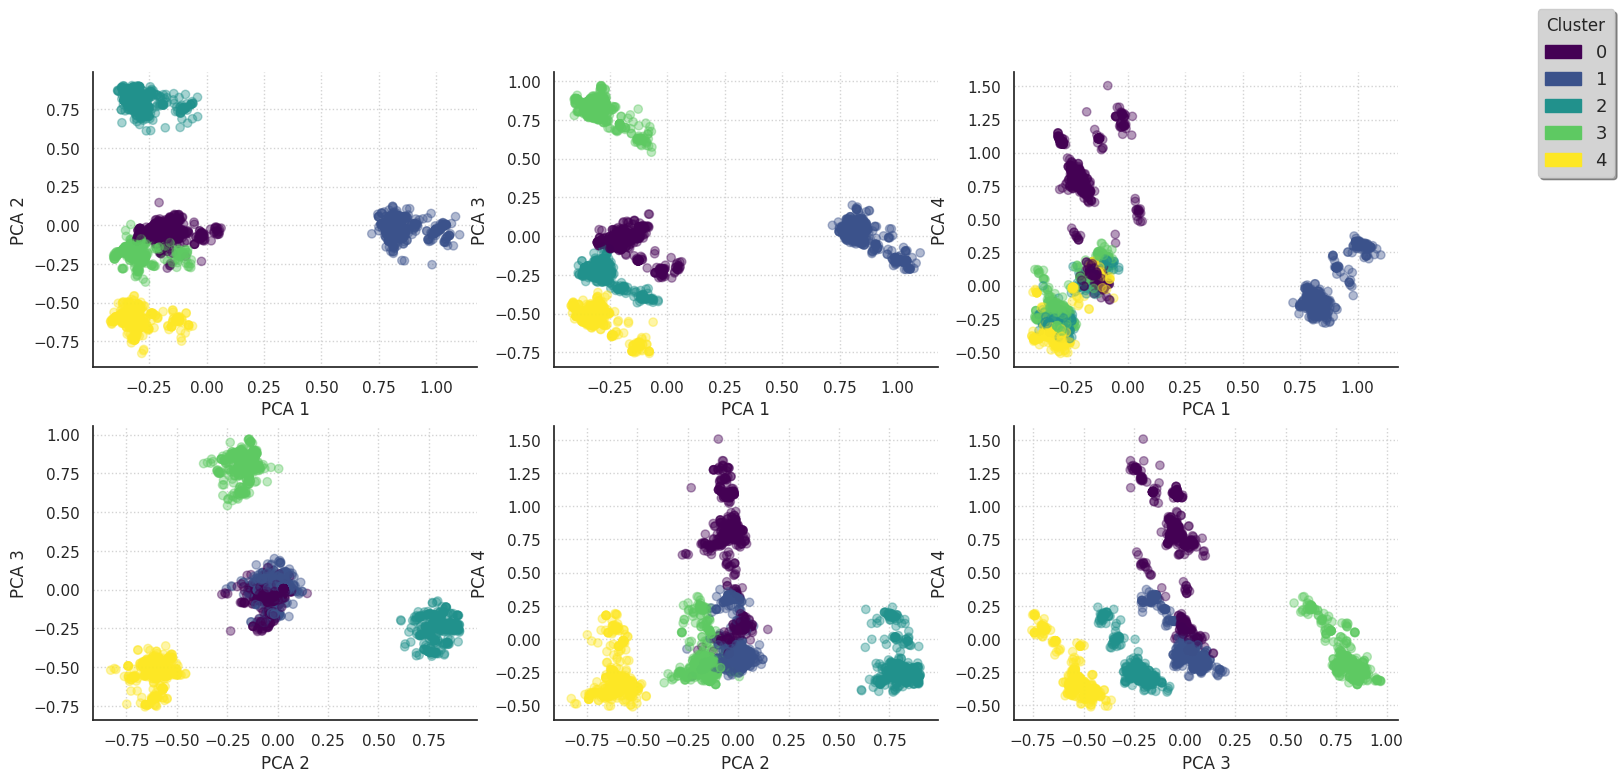

In [57]:
pca = PCA(n_components=50)
matrix_9D = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
cmap = plt.get_cmap("viridis", num_clusters)
cluster_colors = cmap(np.arange(num_clusters))

fig = plt.figure(figsize=(15, 8))
increment = 0
for ix in range(4):
    for iy in range(ix + 1, 4):
        increment += 1
        ax = fig.add_subplot(2, 3, increment)
        ax.scatter(mat[ix], mat[iy], c=cluster_colors[mat['cluster']], alpha=0.4)
        plt.ylabel('PCA {}'.format(iy + 1), fontsize=12)
        plt.xlabel('PCA {}'.format(ix + 1), fontsize=12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        if increment == 9:
            break
    if increment == 9:
        break

comp_handler = []
for i in range(num_clusters):
    comp_handler.append(mpatches.Patch(color=cluster_colors[i], label=i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97),
           title='Cluster', facecolor='lightgrey',
           shadow=True, frameon=True, framealpha=1,
           fontsize=13, bbox_transform=plt.gcf().transFigure)

plt.show()


# <font face="Arial" size="5" color="royalblue"><b>4. CUSTOMER SEGMENTATION</b></font>

---

Customer segmentation is similarly the process of dividing an organization’s customer bases into different sections or segments based on various customer attributes. The process of customer segmentation is based on the premise of finding differences among the customers’ behavior and patterns.

The major objectives and benefits behind the motivation for customer segmentation are:

* **Higher Revenue:** This is the most obvious requirement of any customer segmentation project.

* **Customer Understanding:** One of the mostly widely accepted business paradigms is “know your customer” and a segmentation of the customer base allows for a perfect dissection of this paradigm.

* **Target Marketing:** The most visible reason for customer segmentation is the ability to focus marketing efforts effectively and efficiently. If a firm knows the different segments of its customer base, it can devise better marketing campaigns which are tailor made for the segment. A good segmentation model allows for better understanding of customer requirements and hence increases the chances of the success of any marketing campaign developed by the organization.

* **Optimal Product Placement:** A good customer segmentation strategy can also help the firm with developing or offering new products, or a bundle of products together as a combined offering.

* **Finding Latent Customer Segments:** Finding out which segment of customers it might be missing to identifying untapped customer segments by focused on marketing campaigns or new business development.



**Clustering:**

The most obvious method to perform customer segmentation is using unsupervised Machine Learning methods like clustering. The method is as simple as collecting as much data about the customers as possible in the form of features or attributes and then finding out the different clusters that can be obtained from that data. Finally, we can find traits of customer segments by analyzing the characteristics of the clusters.

**Exploratory Data Analysis:**

Using exploratory data analysis is another way of finding out customer segments. This is usually done by analysts who have a good knowledge about the domain relevant to both products and customers. It can be done flexibly to include the top decision points in an analysis.

**RFM Model for Customer Value:**
Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a **RFM(Recency, Frequency and Monetary Value)**, based model of customer value for finding our customer segments. The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:

* **Recency:** The value of how recently a customer purchased at the establishment.

* **Frequency:** How frequent the customer’s transactions are at the establishment.

* **Monetary value:** The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment.




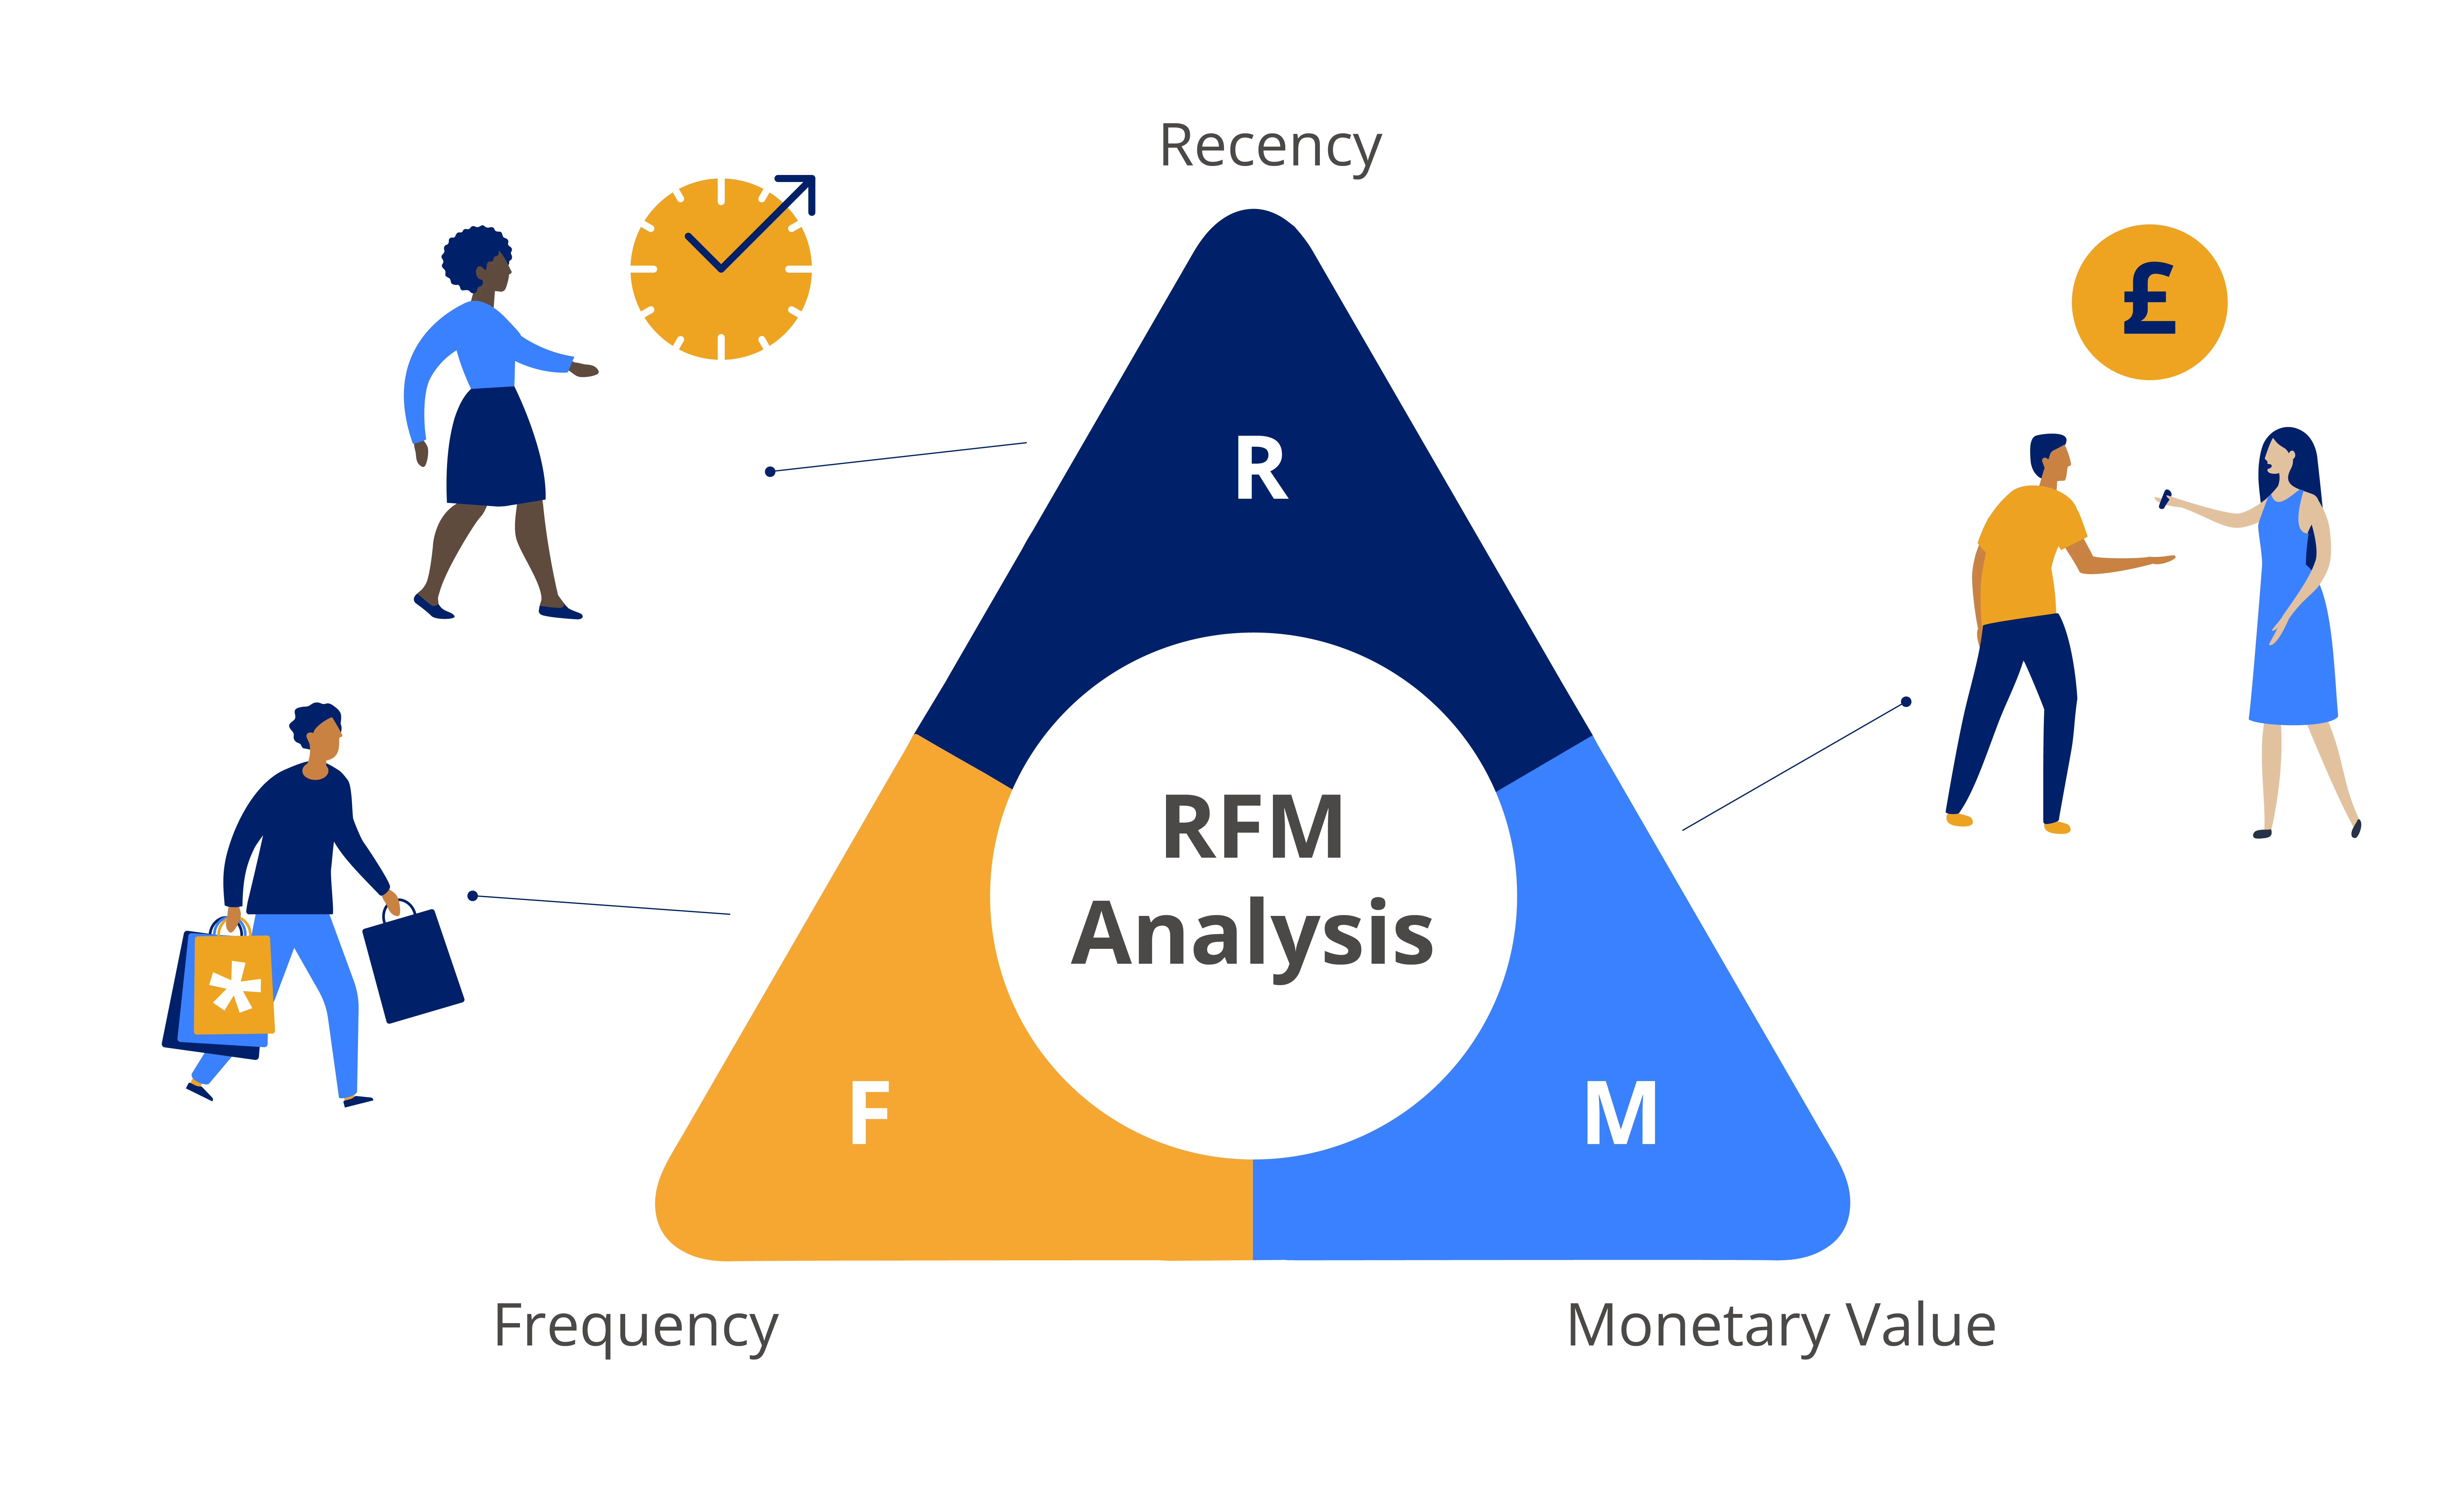

### <font face="Arial" size="5" color="royalblue"><b>RECENCY</b></font>

---

To create the recency feature variable, we need to decide the reference date for our analysis. Usually, we make use of the last transaction date plus one day. Then, we will construct the recency variable as the number of days before the reference date when a customer last made a purchase.

In [90]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Calculate the reference date
reference_date = df['InvoiceDate'].max() + datetime.timedelta(days=1)
print('Reference Date:', reference_date)
# Calculate days since last purchase
df['days_since_last_purchase'] = (reference_date - df['InvoiceDate']).dt.days
# Create the customer history DataFrame
customer_history_df = df[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase': 'recency'}, inplace=True)

Reference Date: 2011-12-10 12:50:00


We will plot the Recency Distribution and QQ-plot to identify substantive departures from normality, likes outliers, skewness and kurtosis.

**Recency Distribution Plot:**
The Recency Distribution plot (usually in the form of a histogram or a density plot) helps us to understand how recency values are distributed across your customer base.

**QQ-Plot for Normality Assessment:**
A QQ-plot is a graphical tool used to assess whether a dataset follows a normal distribution (bell curve). In a QQ-plot, the quantiles of the data are compared to the quantiles of a theoretical normal distribution. If the points on the QQ-plot closely follow a straight line, it indicates that the data is approximately normally distributed. If the points deviate from the line, it suggests departures from normality, such as outliers, skewness (asymmetry), or kurtosis (peakedness).

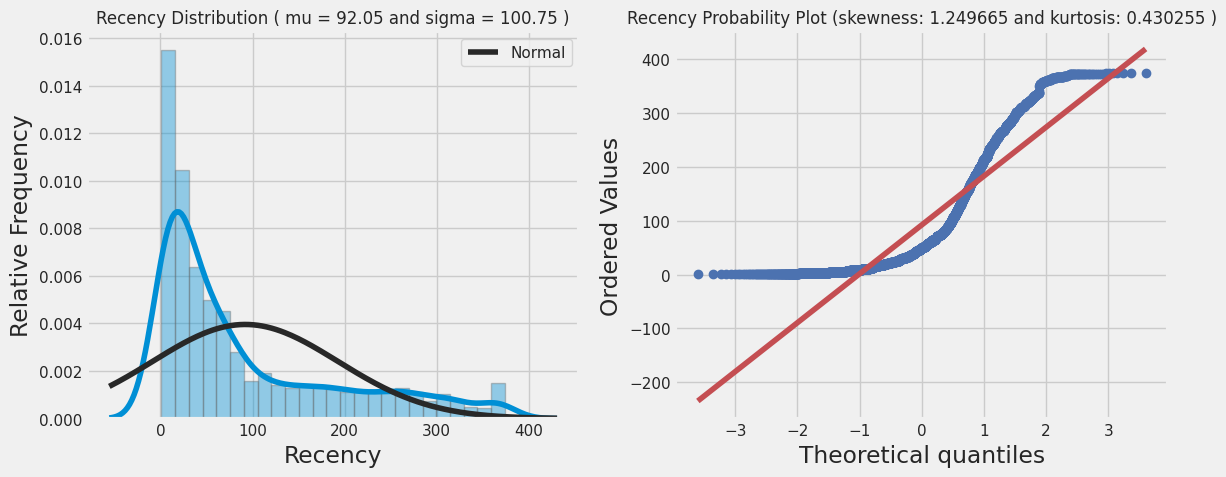

In [82]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(12, 5))

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    # Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm, fit_kws={'label': 'Normal'})
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center', fontdict={'size': 12})
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Relative Frequency')
    fig1.legend()  # Add legend

    # QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center', fontdict={'size': 12})

    plt.tight_layout()
    plt.show()

# Example usage
QQ_plot(customer_history_df.recency, 'Recency')

* The sales recency distribution is skewed, with a peak on the left and a longer tail on the right, indicating positive bias.

* The probability plot confirms the right-skewed nature of the distribution.

* A positive skewness value of 1.25 confirms the right-skewed shape, indicating more data points on the right side.

* The sales distribution plot also demonstrates a longer tail on the right side, characteristic of right-skewed distributions.

* A positive kurtosis value of 0.43 indicates heavy-tailed behavior and the presence of outliers.

In summary, the sales recency distribution is positively skewed, with a prominent right-leaning tail and indications of heavy-tailed behavior and outliers.

### <font face="Arial" size="5" color="royalblue"><b>FREQUENCY</b></font>

---


The frequency of customer transactions at the establishment refers to how often customers make purchases. It can be measured by the average number of transactions within a given time period. Higher frequency indicates more frequent visits, while lower frequency suggests less frequent customer engagement with the establishment.

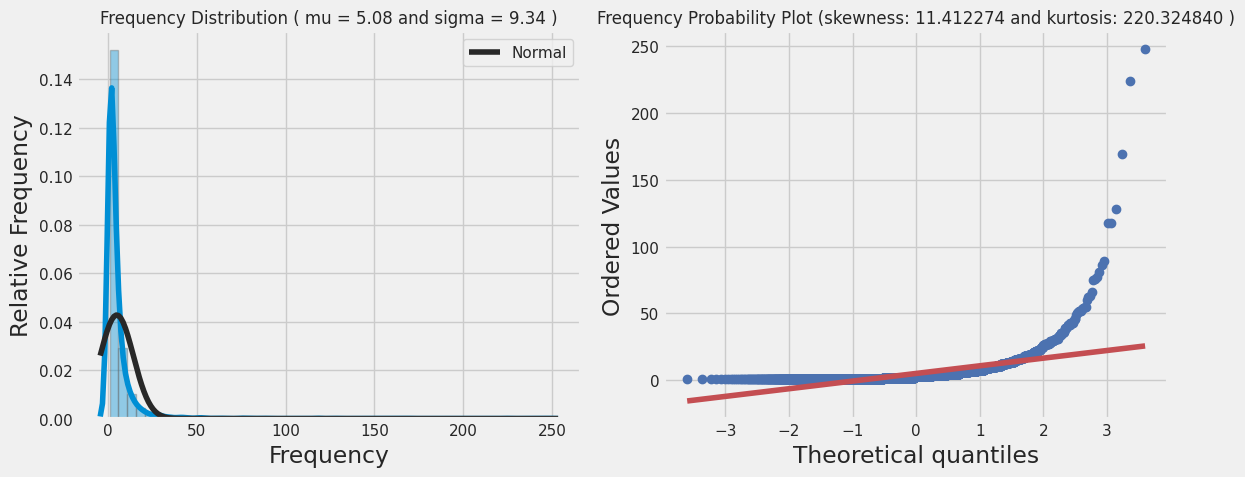

In [91]:
customer_freq = (df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq)
QQ_plot(customer_history_df.frequency, 'Frequency')


* The sales frequency distribution shows left-side peaking and a longer right tail, indicating positive skewness and departure from normality.

* The probability plot confirms right-skewed shape.

* High positive skewness of 11.4 emphasizes strong asymmetry towards lower frequencies.

* Kurtosis of 220.32 indicates heavy-tailed distribution with outliers.

In summary, the sales frequency distribution is highly right-skewed, indicating infrequent high-frequency occurrences, and features heavy-tailed behavior with noticeable outliers.

### <font face="Arial" size="5" color="royalblue"><b>MONEYTARY VALUE</b></font>

---


The customer's monetary value of transactions at the establishment represents the total amount spent. It reflects the sum of dollars (or pounds) across all transactions made by the customer. This metric is crucial for assessing customer spending patterns, loyalty, and overall business revenue generation.

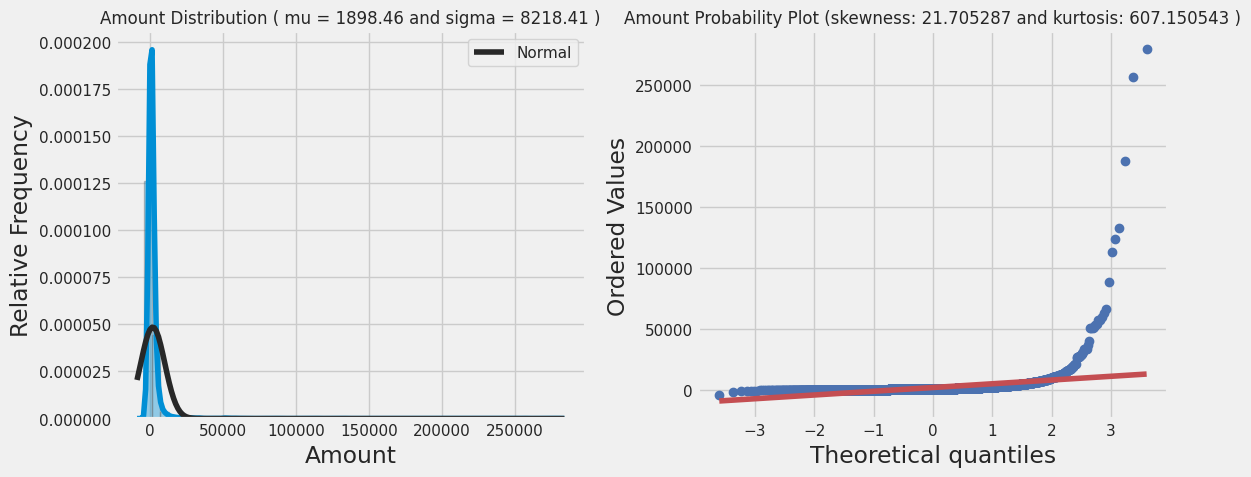

In [92]:
df['amount'] = df.Quantity*df.UnitPrice
customer_monetary_val = df[['CustomerID', 'amount']].groupby("CustomerID").sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val)
QQ_plot(customer_history_df.amount, 'Amount')

* The sales amount distribution is skewed, with a left-sided peak and a long right tail, indicating positive bias and deviation from normality.

* The probability plot reinforces right-skewedness, particularly on the right side.

* A high positive skewness of 21.7 highlights significant asymmetry towards lower sales amounts.

* Kurtosis of 607 signifies a heavily tailed distribution with a notable presence of outliers, potentially including more than 10 extreme values.

In summary, the sales amount distribution is strongly right-skewed, demonstrating substantial positive bias, a heavy-tailed pattern with potential outliers, and departure from a normal distribution.

Let's see a statistical summary of this dataset:

In [93]:
customer_history_df.describe()

,recency,frequency,amount
count,4372.000000,4372.000000,4372.000000
mean,92.047118,5.075480,1898.459701
std,100.765435,9.338754,8219.345141
min,1.000000,1.000000,-4287.630000
25%,17.000000,1.000000,293.362500
50%,50.000000,3.000000,648.075000
75%,143.000000,5.000000,1611.725000
max,374.000000,248.000000,279489.020000


In [99]:
for col in ['recency', 'frequency', 'amount']:
    if (customer_history_df[col] <= 0).any() or customer_history_df[col].isnull().any():
        print(f"Problematic values in column '{col}'; fixing...")
        customer_history_df[col] = customer_history_df[col].apply(lambda x: max(x, 1e-9) if pd.notnull(x) else x)

customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(math.log)
customer_history_df['amount_log'] = customer_history_df['amount'].apply(math.log)

feature_vector = ['amount_log', 'recency_log', 'frequency_log']
X_subset = customer_history_df[feature_vector]

scaler = StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)

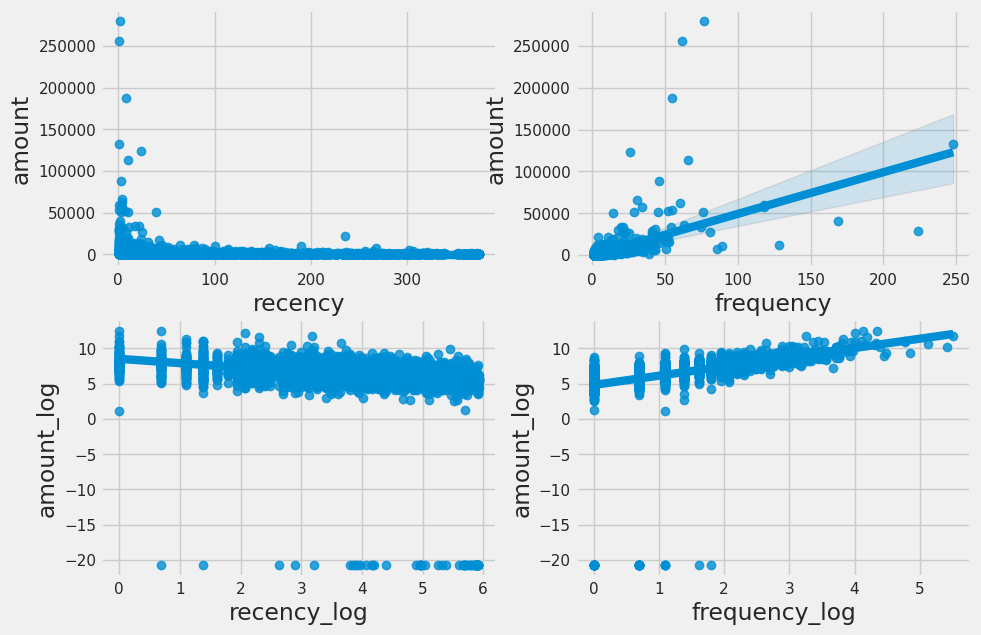

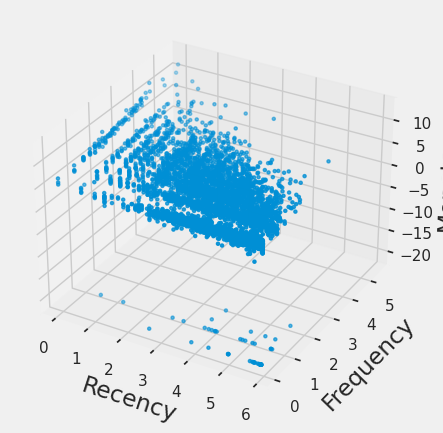

In [106]:
fig = plt.figure(figsize=(10,7))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='amount_log', data=customer_history_df)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()